## Title, Name and References
**Agenda:** Final Project for the course work CSIS 3290 Fall 20  
**Student Name:** Tarek Ahmed  
**Student ID:** 300315679  
**Reference**: https://archive.ics.uci.edu/ml/datasets/wine+quality

# Importing Necessity libraries

In [1]:
#Common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries I have used for this notebook
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

%matplotlib inline

# Dataset 
Dataset description is on https://archive.ics.uci.edu/ml/datasets/wine+quality <br/>
Dataset downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/ <br/>

Description from author: <br/>

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None



There are two datasets, one for white wine and one for red wine. Let's see which one has more data.

# Load Dataset

In [2]:
df1 = pd.read_csv('Dataset/winequality-white.csv',low_memory=False,sep=";")
df2 = pd.read_csv('Dataset/winequality-red.csv',low_memory=False,sep=";")

Let's print their shape to see which dataset has more data

In [3]:
print(df1.shape)
print(df2.shape)

(4898, 12)
(1599, 12)


We can see that dataset including white wine quality has more values so we are going to use white wine quality for our analysis and prediction.

In [4]:
df = df1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


There is no string type or categorical data in the dataset. We have just one int column which is our target and rest are float.

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Checking null data

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Let's see the columns

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Column names has white space, so we can replace space with _ .

In [9]:
df.columns = [x.strip().replace(' ','_') for x in df.columns]

In [10]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


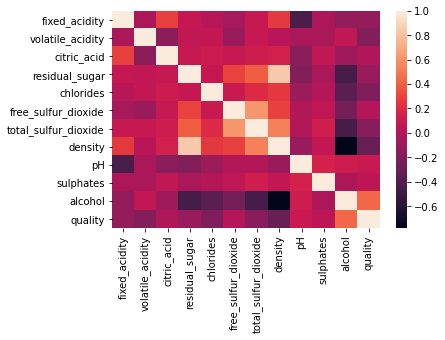

In [12]:
sns.heatmap(df.corr())
plt.show()

- Density <-> Quality have a relation
- Quality <-> Alcohol have a relation
- Density <-> Residual Sugar have a relation

## EDA

<AxesSubplot:xlabel='quality', ylabel='count'>

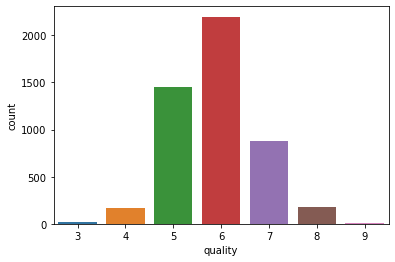

In [13]:
sns.countplot(x=df['quality'])

This graph shows most of the quality ranking is between 5 to 7.

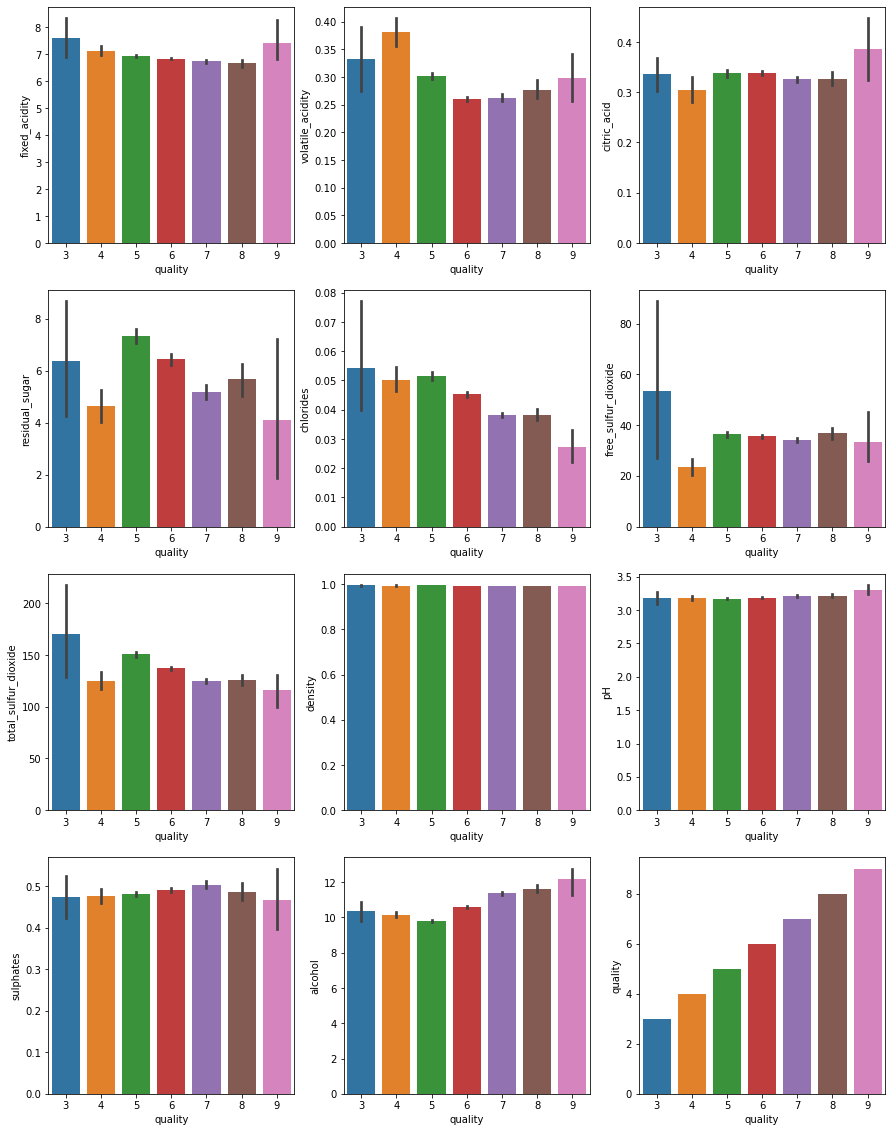

In [14]:
fig = plt.figure(figsize = [15,20])
cnt = 1
for i in df.columns:
    plt.subplot(4,3,cnt)
    sns.barplot(x='quality',y=i,data=df)
    cnt +=1

- When alcohol rate is increased quality has increased
- When chlorides rate is increased quality has increased
- Quality and density seems to have no connection
- When pH rate is increased quality has increased

In [15]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Setting up prediction column

To predict the value of wine quality, I think it's better to generalize the wine quality. Instead of decimal values, I am going to put 0/1 values based on either it's above median or not.

In [16]:
quality_median_value = df.quality.median()
print(quality_median_value)

6.0


In [17]:
df.quality = [1 if x>=quality_median_value else 0 for x in df.quality]

In [18]:
df.quality

0       1
1       1
2       1
3       1
4       1
       ..
4893    1
4894    0
4895    1
4896    1
4897    1
Name: quality, Length: 4898, dtype: int64

In [19]:
df['quality'].value_counts()

1    3258
0    1640
Name: quality, dtype: int64

In [20]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [21]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


# Feature Engineering

In [22]:
Y = df.quality
X = df.drop('quality',axis=1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

## Feature Scaling & Selection

In [24]:
vt = VarianceThreshold(threshold=.25)
vt.fit(X_train)
pd.DataFrame({'variance': vt.variances_, 'select_feature': vt.get_support()}, index=X.columns).T

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
variance,0.71297,0.0103211,0.0143382,26.4058,0.000475006,278.05,1769.24,9.12828e-06,0.0225492,0.0128994,1.50732
select_feature,True,False,False,True,False,True,True,False,False,False,True


Column with True values indicates that it will be good to select as feature.

In [25]:
columns_to_select = ['fixed_acidity','residual_sugar','free_sulfur_dioxide','total_sulfur_dioxide','alcohol']
X_train_sc = X_train[columns_to_select]
X_test_sc = X_test[columns_to_select]

In [26]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()

X_train_sc = pd.DataFrame(transformer.fit_transform(X_train_sc.values),columns=X_train_sc.columns,index=X_train_sc.index)
X_test_sc = pd.DataFrame(transformer.fit_transform(X_test_sc.values),columns=X_test_sc.columns,index=X_test_sc.index)

# Modeling

### Model Pipeline without feature scaling

In [27]:
names = ["Naive Bayes","KNN","Decission Tree","Random Forest","Ada BOOST","SVC"]
scores = []

In [28]:
classifiers = [
    GaussianNB(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    SVC(gamma='auto')
]

In [29]:
for classifier in classifiers:
    pipeline = Pipeline(steps=[('classifier', classifier)])
    pipeline.fit(X_train, y_train)   
    print(classifier)
    scores.append(pipeline.score(X_test, y_test))
    print("model score: %.3f" % pipeline.score(X_test, y_test))
    print("\n -----------------------------------------------------------------------------------")

GaussianNB()
model score: 0.711

 -----------------------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=3)
model score: 0.724

 -----------------------------------------------------------------------------------
DecisionTreeClassifier(max_depth=5)
model score: 0.746

 -----------------------------------------------------------------------------------
RandomForestClassifier(n_estimators=200)
model score: 0.837

 -----------------------------------------------------------------------------------
AdaBoostClassifier()
model score: 0.752

 -----------------------------------------------------------------------------------
SVC(gamma='auto')
model score: 0.768

 -----------------------------------------------------------------------------------


In [30]:
scores_df = pd.DataFrame(zip(names,scores), columns=['Classifier', 'Accuracy Score'])
print(scores_df)

       Classifier  Accuracy Score
0     Naive Bayes        0.711224
1             KNN        0.724490
2  Decission Tree        0.745918
3   Random Forest        0.836735
4       Ada BOOST        0.752041
5             SVC        0.768367


So we can see RandomForestClassifier makes the highest accuracy among all the classifiers used here.

### Model Pipeline with feature scaling

In [31]:
scores = []
for classifier in classifiers:
    pipeline = Pipeline(steps=[('classifier', classifier)])
    pipeline.fit(X_train_sc, y_train)   
    print(classifier)
    scores.append(pipeline.score(X_test_sc, y_test))
    print("model score: %.3f" % pipeline.score(X_test_sc, y_test))
    print("\n -----------------------------------------------------------------------------------")

GaussianNB()
model score: 0.676

 -----------------------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=3)
model score: 0.746

 -----------------------------------------------------------------------------------
DecisionTreeClassifier(max_depth=5)
model score: 0.698

 -----------------------------------------------------------------------------------
RandomForestClassifier(n_estimators=200)
model score: 0.785

 -----------------------------------------------------------------------------------
AdaBoostClassifier()
model score: 0.706

 -----------------------------------------------------------------------------------
SVC(gamma='auto')
model score: 0.727

 -----------------------------------------------------------------------------------


In [32]:
scores_df = pd.DataFrame(zip(names,scores), columns=['Classifier', 'Accuracy Score'])
print(scores_df)

       Classifier  Accuracy Score
0     Naive Bayes        0.675510
1             KNN        0.745918
2  Decission Tree        0.697959
3   Random Forest        0.784694
4       Ada BOOST        0.706122
5             SVC        0.726531


So we can see RandomForestClassifier makes the highest accuracy among all the classifiers used here.

### Hypertuning best model

In both the cases our best model was RandomForestClassfier. So I will try to get the best parameters for this algorithm using different techniques taught in the class.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [34]:
model = RandomForestClassifier(n_estimators=200)

In [35]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestClassifier()
clf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3,n_jobs = -1, verbose = 2)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  1.2min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [36]:
print(clf.best_params_)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

{'bootstrap': True, 'max_depth': 100, 'max_features': 2, 'n_estimators': 100}
0.8459183673469388
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       321
           1       0.87      0.91      0.89       659

    accuracy                           0.85       980
   macro avg       0.83      0.81      0.82       980
weighted avg       0.84      0.85      0.84       980



### Final Model score

In [37]:
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.8489795918367347
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       321
           1       0.87      0.91      0.89       659

    accuracy                           0.85       980
   macro avg       0.83      0.82      0.82       980
weighted avg       0.85      0.85      0.85       980

